In [2]:
import pandas as pd

In [3]:
# 1. 사원의 이름, 봉급을 출력해보자
emp = pd.read_csv("emp.csv")
emp[['ename', 'sal']]  # 데이터 프레임명 [ [ '컬럼명1', '컬럼명2'] ] 

,ename,sal
0,KING,5000
1,BLAKE,2850
2,CLARK,2450
3,JONES,2975
4,MARTIN,1250
5,ALLEN,1600
6,TURNER,1500
7,JAMES,950
8,WARD,1250
9,FORD,3000


In [11]:
# 2. 사원의 이름, 봉급, 직업, 입사일을 출력해보자
emp[['ename', 'sal','job', 'hiredate']]

,ename,sal,job,hiredate
0,KING,5000,PRESIDENT,1981-11-17 0:00
1,BLAKE,2850,MANAGER,1981-05-01 0:00
2,CLARK,2450,MANAGER,1981-05-09 0:00
3,JONES,2975,MANAGER,1981-04-01 0:00
4,MARTIN,1250,SALESMAN,1981-09-10 0:00
5,ALLEN,1600,SALESMAN,1981-02-11 0:00
6,TURNER,1500,SALESMAN,1981-08-21 0:00
7,JAMES,950,CLERK,1981-12-11 0:00
8,WARD,1250,SALESMAN,1981-02-23 0:00
9,FORD,3000,ANALYST,1981-12-11 0:00


In [12]:
# 3. 직업이 'SALESMAN'인 사원의 이름과 봉급 그리고 직업을 출력해보자
# SELECT ENAME, SAL, JOB FROM EMP WHERE JOB = 'SALESMAN'   오라클

emp[['ename', 'sal', 'job']] [emp['job'] == 'SALESMAN']

,ename,sal,job
4,MARTIN,1250,SALESMAN
5,ALLEN,1600,SALESMAN
6,TURNER,1500,SALESMAN
8,WARD,1250,SALESMAN


In [14]:
# 4. 월급이 3000이상인 사원들의 이름과 월급을 출력하자
emp[['ename', 'sal']] [emp['sal'] >= 3000]

,ename,sal
0,KING,5000
9,FORD,3000
11,SCOTT,3000


In [18]:
# 5. 월급이 1000 ~ 3000 의 월급을 받는 사원들의 이름과 월급을 출력하자
emp[['ename', 'sal']] [emp['sal'].between (1000,3000)]
res01 = [emp['sal']]
print(res01, type(res01))

[0     5000
1     2850
2     2450
3     2975
4     1250
5     1600
6     1500
7      950
8     1250
9     3000
10     800
11    3000
12    1100
13    1300
Name: sal, dtype: int64] <class 'list'>


In [19]:
# 6. 월급이 1000 ~ 3000 사이가 아닌 월급을 받는 사원들의 이름과 월급을 출력하자
# not 연산자가 판다스에서는 ~ 연산자

emp[['ename', 'sal']] [~emp['sal'].between (1000,3000)]

,ename,sal
0,KING,5000
7,JAMES,950
10,SMITH,800


SQL VS 판다스
1. BETWEEN... AND  /  EMP['SAL'].between()
2. in              /  EMP['JOB'].isin([,,,])
3. like            /  apply() 함수

In [22]:
# 6. 직업이 CLERK, SALESMAN인 사원들의 이름과 직업을 출력해보자
emp[['ename', 'job']] [emp['job'].isin(['CLERK', 'SALESMAN'])]

,ename,job
4,MARTIN,SALESMAN
5,ALLEN,SALESMAN
6,TURNER,SALESMAN
7,JAMES,CLERK
8,WARD,SALESMAN
10,SMITH,CLERK
12,ADAMS,CLERK
13,MILLER,CLERK


In [23]:
# 7. 직업이 CLERK, SALESMAN이 아닌 사원들의 이름과 직업을 출력해보자
emp[['ename', 'job']] [~emp['job'].isin(['CLERK', 'SALESMAN'])]

,ename,job
0,KING,PRESIDENT
1,BLAKE,MANAGER
2,CLARK,MANAGER
3,JONES,MANAGER
9,FORD,ANALYST
11,SCOTT,ANALYST


In [24]:
# 8. 커미션이 null인 사원의 이름과 커미션을 출력해보자
emp[['ename', 'comm']] [emp['comm'].isnull()]

,ename,comm
0,KING,NaN
1,BLAKE,NaN
2,CLARK,NaN
3,JONES,NaN
7,JAMES,NaN
9,FORD,NaN
10,SMITH,NaN
11,SCOTT,NaN
12,ADAMS,NaN
13,MILLER,NaN


In [5]:
# 8. 커미션이 null이 아닌 사원의 이름과 커미션을 출력해보자
emp[['ename', 'comm']] [~emp['comm'].isnull()]

,ename,comm
4,MARTIN,1400.0
5,ALLEN,300.0
6,TURNER,0.0
8,WARD,500.0


In [28]:
# 10. 이름의 끝자를 출력해보자 
for i in emp['ename']:
    print(i, i[-1])

KING G
BLAKE E
CLARK K
JONES S
MARTIN N
ALLEN N
TURNER R
JAMES S
WARD D
FORD D
SMITH H
SCOTT T
ADAMS S
MILLER R


In [31]:
# 11. 이름의 끝자의 철자가 S로 끝나는 사원의 이름을 출력해보자
for i in emp['ename']:
    if i[-1] == 'S':
        print(i, i[-1])

JONES S
JAMES S
ADAMS S


In [33]:
# 12. select ename || sal from emp;
# zip 함수를 for loop에서 사용하게 되면 두개의 범위에 있는 데이터를 한번에 받아서 수행할 수 있다.
# 문자열 + 문자열
# 문자열 + str(숫자)

for i, k in zip(emp['ename'], emp['sal']):
    print(i+':'+str(k))

KING:5000
BLAKE:2850
CLARK:2450
JONES:2975
MARTIN:1250
ALLEN:1600
TURNER:1500
JAMES:950
WARD:1250
FORD:3000
SMITH:800
SCOTT:3000
ADAMS:1100
MILLER:1300


In [41]:
# 13. 월급이 3000 이상인 사원들은 해당월급을 볼 수 없습니다 라는 문구를 출력해보자
name = input('이름을 입력하세요 ')
result = emp['sal'] [emp['ename'] == name.upper()].values[0]
result
if result >= 3000:
    raise Exception('해당 사원의 월급을 볼 수 없다')
print(emp['sal'] [emp['ename'] == name.upper()])

이름을 입력하세요 smith
10    800
Name: sal, dtype: int64


In [6]:
# 14. 없는 사원의 이름을 입력하면 해당사원은 없습니다 라는 문구를 출력해보자
try:
    name = input('이름을 입력하세요 ')
    result = emp['ename'] [emp['ename'] == name.upper()].values[0]
    print(emp[['ename', 'sal']] [emp['ename'] == result])
except IndexError:
    print('해당 사원은 없습니다')


이름을 입력하세요 smith
    ename  sal
10  SMITH  800


판다스로 조인(join)을 하기위해서는 merge를 사용하면 된다

문법 : pandas.merge(emp_left, dept_right, how='inner', on='deptno')

옵션
- how = 'inner' : emp와 dept 데이터 프레임에 공통적으로 존재하는 교집합일 경우에만 추출하겠다
- how = 'outer' : 열의 데이터가 양쪽 데이터 프레임에 공통적으로 존재하는 교집합이 아니어도 추출하겠다.
- how = 'left' : 왼쪽 데이터 프레임의 키열에 속하는 데이터값을 기준으로 병합하겠다
- how = 'right' : 오른쪽 데이터 프레임의 키열에 속하는 데이터값을 기준으로 병합하겠다

In [7]:
# 16. 사원의 이름과 부서 위치를 출력하자
# select e.ename, d.loc from emp e, dept p where e.deptno = d.deptno
emp = pd.read_csv("emp.csv")
dept = pd.read_csv('dept.csv')
result = pd.merge(emp, dept, on='deptno')
print(result)
result[['ename', 'loc']]

    empno   ename        job     mgr         hiredate   sal    comm  deptno  \
0    7839    KING  PRESIDENT     NaN  1981-11-17 0:00  5000     NaN      10   
1    7782   CLARK    MANAGER  7839.0  1981-05-09 0:00  2450     NaN      10   
2    7934  MILLER      CLERK  7782.0  1982-01-11 0:00  1300     NaN      10   
3    7698   BLAKE    MANAGER  7839.0  1981-05-01 0:00  2850     NaN      30   
4    7654  MARTIN   SALESMAN  7698.0  1981-09-10 0:00  1250  1400.0      30   
5    7499   ALLEN   SALESMAN  7698.0  1981-02-11 0:00  1600   300.0      30   
6    7844  TURNER   SALESMAN  7698.0  1981-08-21 0:00  1500     0.0      30   
7    7900   JAMES      CLERK  7698.0  1981-12-11 0:00   950     NaN      30   
8    7521    WARD   SALESMAN  7698.0  1981-02-23 0:00  1250   500.0      30   
9    7566   JONES    MANAGER  7839.0  1981-04-01 0:00  2975     NaN      20   
10   7902    FORD    ANALYST  7566.0  1981-12-11 0:00  3000     NaN      20   
11   7369   SMITH      CLERK  7902.0  1980-12-09 0:0

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,BLAKE,CHICAGO
4,MARTIN,CHICAGO
5,ALLEN,CHICAGO
6,TURNER,CHICAGO
7,JAMES,CHICAGO
8,WARD,CHICAGO
9,JONES,DALLAS


In [48]:
# 16. 'DALLAS'에서 근무하는 사원의 이름과 부서 위치를 출력하자
emp = pd.read_csv("emp.csv")
dept = pd.read_csv('dept.csv')
result = pd.merge(emp, dept, on='deptno')
result[['ename', 'loc']] [result['loc'] == 'DALLAS']

,ename,loc
9,JONES,DALLAS
10,FORD,DALLAS
11,SMITH,DALLAS
12,SCOTT,DALLAS
13,ADAMS,DALLAS


In [47]:
# 17. select e.ename, d.loc from emp e, dept d where e.deptno(+) = d.deptno;
result = pd.merge(emp, dept, on='deptno', how='right')
result[['ename', 'loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,JONES,DALLAS
4,FORD,DALLAS
5,SMITH,DALLAS
6,SCOTT,DALLAS
7,ADAMS,DALLAS
8,BLAKE,CHICAGO
9,MARTIN,CHICAGO


In [59]:
# 18. 월급의 최대값, 최소, 합계, 분산, 표준편차, 평균을 구해보자
emp['sal'].max(), emp['sal'].min(), emp['sal'].sum(), emp['sal'].var(), emp['sal'].std(), emp['sal'].mean()

(5000, 800, 29025, 1398313.8736263737, 1182.5032235162716, 2073.214285714286)

In [51]:
# 19. 20번 사원의 월급 중 최대값을 구해보자
# select max(sal) from emp where deptno = 20;
emp['sal'] [emp['deptno'] == 20].max()

3000

In [52]:
# 20.직업이 SALESMAN인 사원이 받은 가장 작은월급을 출력해보자
emp['sal'] [emp['job'] == 'SALESMAN'].min()

1250

In [55]:
# 21. reset_index() : Series(컬럼)으로 출력하는 것이 아니라 DataFrame(테이블)로 출력하는 메소드이다
# 직업별 봉급의 가장 큰 금액을 출력해보자
# select job, max(sal) from emp group by job;

result = emp.groupby('job')['sal'].max().reset_index()
print(type(result))
result

<class 'pandas.core.frame.DataFrame'>


,job,sal
0,ANALYST,3000
1,CLERK,1300
2,MANAGER,2975
3,PRESIDENT,5000
4,SALESMAN,1600


In [56]:
# 22. 부서별 봉급의 합계를 구해보자
# select deptno, sum(sal) from emp group by deptno;

result = emp.groupby('deptno')['sal'].sum().reset_index()
result

,deptno,sal
0,10,8750
1,20,10875
2,30,9400


In [61]:
# 23. 부서번호, 부서별 봉급의 평균을 구해보자
# select deptno, avg(sal) from emp group by deptno;

result = emp.groupby('deptno')['sal'].mean().reset_index().astype(int)
result

,deptno,sal
0,10,2916
1,20,2175
2,30,1566


In [63]:
# 만약 판다스를 사용하지 않고 csv를 사용할 때

import csv
file = open("emp.csv")
emp_csv = csv.reader(file)
print(emp_csv)

for emp_list in emp_csv:
    print(emp_list[0], emp_list[2])

empno job
7839 PRESIDENT
7698 MANAGER
7782 MANAGER
7566 MANAGER
7654 SALESMAN
7499 SALESMAN
7844 SALESMAN
7900 CLERK
7521 SALESMAN
7902 ANALYST
7369 CLERK
7788 ANALYST
7876 CLERK
7934 CLERK


In [64]:
# 24. apply() 함수를 이용해서 형변환 사용
emp['sal'] = emp['sal'].apply(float)
emp[['ename', 'sal']]

,ename,sal
0,KING,5000.0
1,BLAKE,2850.0
2,CLARK,2450.0
3,JONES,2975.0
4,MARTIN,1250.0
5,ALLEN,1600.0
6,TURNER,1500.0
7,JAMES,950.0
8,WARD,1250.0
9,FORD,3000.0


In [80]:
# 25. 결측치에 관한 내용을 살펴보자.
#1) 결측치 유무
print(emp.isnull())

#2) 결측치 개수 확인
print(emp.isnull().sum())

    empno  ename    job    mgr  hiredate    sal   comm  deptno  job_avgsal
0   False  False  False   True     False  False   True   False       False
1   False  False  False  False     False  False   True   False       False
2   False  False  False  False     False  False   True   False       False
3   False  False  False  False     False  False   True   False       False
4   False  False  False  False     False  False  False   False       False
5   False  False  False  False     False  False  False   False       False
6   False  False  False  False     False  False  False   False       False
7   False  False  False  False     False  False   True   False       False
8   False  False  False  False     False  False  False   False       False
9   False  False  False  False     False  False   True   False       False
10  False  False  False  False     False  False   True   False       False
11  False  False  False  False     False  False   True   False       False
12  False  False  False  

In [82]:
# 26. 파생변수, 칼럼 추가
# sal02 컬럼을 추가해서 sal이 가진 값을 대입하자.
emp = pd.read_csv('emp.csv')
emp['sal02'] = emp['sal']
emp
# emp 테이블에서 퇴사할 것 같은 사원이 누구인지 예측하시오
# 사원의 월급이 사원이 속한 직웜의 평균월급보다 더 작은 월급을 받는 사원은 퇴사할 가능성이 높다.

,empno,ename,job,mgr,hiredate,sal,comm,deptno,sal02
0,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,5000
1,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,2850
2,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,2450
3,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,2975
4,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,1250
5,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,1600
6,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,1500
7,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950,NaN,30,950
8,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30,1250
9,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20,3000


In [79]:
# 파생변수 예제
# 1) 직업별 평균월급을 구하자
emp = pd.read_csv("emp.csv")
result = emp.groupby('job')['sal'].mean().reset_index()
result

# 2) 출력된 result의 sal을 정수형으로 반영하자
result['sal'] = result['sal'].astype(int)
print(result)

# 3) emp와 result를 서로 조인해서 전체 출력해보자
result02 = pd.merge(emp, result, how='inner', on='job')
result02  # 컬럼을 추가하게되면 emp, result의 동일한 이름의 sal이 있어서 sal_x, result는 sal_y로 변경

# 4) emp 프레임에 컬럼을 job_avgsal로 추가하고 result02의 sal_y 컬럼을 추가하자
emp['job_avgsal'] = result02['sal_y']
emp

         job   sal
0    ANALYST  3000
1      CLERK  1037
2    MANAGER  2758
3  PRESIDENT  5000
4   SALESMAN  1400


,empno,ename,job,mgr,hiredate,sal,comm,deptno,job_avgsal
0,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,5000
1,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,2758
2,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,2758
3,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,2758
4,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,1400
5,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,1400
6,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,1400
7,7900,JAMES,CLERK,7698.0,1981-12-11 0:00,950,NaN,30,1400
8,7521,WARD,SALESMAN,7698.0,1981-02-23 0:00,1250,500.0,30,1037
9,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20,1037


In [83]:
!pip install cx_Oracle

In [84]:
# 28. emp 데이터 프레임을 출력하는데 월급이 높은 사원부터 출력하도록 정렬하세요
# sort_values(컬럼, ascending = True)
# ascending = True : 낮은값에서 높은값, ascending = False : 높은값에서 낮은값

result = emp.sort_values('sal', ascending = False)
result

,empno,ename,job,mgr,hiredate,sal,comm,deptno,sal02
0,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10,5000
9,7902,FORD,ANALYST,7566.0,1981-12-11 0:00,3000,NaN,20,3000
11,7788,SCOTT,ANALYST,7566.0,1982-12-22 0:00,3000,NaN,20,3000
3,7566,JONES,MANAGER,7839.0,1981-04-01 0:00,2975,NaN,20,2975
1,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30,2850
2,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10,2450
5,7499,ALLEN,SALESMAN,7698.0,1981-02-11 0:00,1600,300.0,30,1600
6,7844,TURNER,SALESMAN,7698.0,1981-08-21 0:00,1500,0.0,30,1500
13,7934,MILLER,CLERK,7782.0,1982-01-11 0:00,1300,NaN,10,1300
4,7654,MARTIN,SALESMAN,7698.0,1981-09-10 0:00,1250,1400.0,30,1250


In [89]:
# 29. emp 테이블을 가져다가 데이터 프레임으로 만들자
import cx_Oracle
dsn = cx_Oracle.makedsn("localhost", 1521, 'XE')
db = cx_Oracle.connect('scott', 'TIGER', dsn)

cursor = db.cursor()
cursor.execute("select * from emp")
row = cursor.fetchall()
print(row)

emp = pd.DataFrame(row)
emp

emp.index

[(7369, 'SMITH', 'CLERK', 7902, datetime.datetime(1980, 12, 17, 0, 0), 1210.0, None, 20), (7499, 'ALLEN', 'SALESMAN', 7698, datetime.datetime(1981, 2, 20, 0, 0), 1600.0, 300.0, 30), (7521, 'WARD', 'SALESMAN', 7698, datetime.datetime(1981, 2, 22, 0, 0), 1250.0, 500.0, 30), (7566, 'JONES', 'MANAGER', 7839, datetime.datetime(1981, 4, 2, 0, 0), 2975.0, None, 20), (7654, 'MARTIN', 'SALESMAN', 7698, datetime.datetime(1981, 9, 28, 0, 0), 1250.0, 1400.0, 30), (7698, 'BLAKE', 'MANAGER', 7839, datetime.datetime(1981, 5, 1, 0, 0), 2850.0, None, 30), (7782, 'CLARK', 'MANAGER', 7839, datetime.datetime(1981, 6, 9, 0, 0), 2450.0, None, 10), (7839, 'KING', 'PRESIDENT', None, datetime.datetime(1981, 11, 17, 0, 0), 5000.0, None, 10), (7844, 'TURNER', 'SALESMAN', 7698, datetime.datetime(1981, 9, 8, 0, 0), 1500.0, 0.0, 30), (7900, 'JAMES', 'CLERK', 7698, datetime.datetime(1981, 12, 3, 0, 0), 950.0, None, 30), (7902, 'FORD', 'ANALYST', 7566, datetime.datetime(1981, 12, 3, 0, 0), 3000.0, None, 20), (7934, '

,0,1,2,3,4,5,6,7
0,7369,SMITH,CLERK,7902.0,1980-12-17,1210.0,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600.0,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-22,1250.0,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-04-02,2975.0,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-09-28,1250.0,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850.0,NaN,30
6,7782,CLARK,MANAGER,7839.0,1981-06-09,2450.0,NaN,10
7,7839,KING,PRESIDENT,NaN,1981-11-17,5000.0,NaN,10
8,7844,TURNER,SALESMAN,7698.0,1981-09-08,1500.0,0.0,30
9,7900,JAMES,CLERK,7698.0,1981-12-03,950.0,NaN,30


In [99]:
# 29. emp 테이블을 가져다가 데이터 프레임으로 만들자 컬럼명까지 추가하자
import cx_Oracle
dsn = cx_Oracle.makedsn("localhost", 1521, 'XE')
db = cx_Oracle.connect('scott', 'TIGER', dsn)

cursor = db.cursor()
cursor.execute("select * from emp")
row = cursor.fetchall()

# 컬럼명 가져오기
col_name = cursor.description
col = []
for i in col_name:
    col.append(i[0].lower())
    
print(col)

# 컬럼명을 데이터 프레임에 추가 시키자
emp = pd.DataFrame(row, columns = col)
emp

# 월급의 3000 이상인 사원들의 이름과 월급을 출력해보자
emp[['ename', 'sal']] [emp['sal'] >= 3000]

grouped = emp.groupby('job')
print(grouped)
print(type(grouped))
print(grouped.size())
print(grouped.sum())

# agg(), aggregate()
print(grouped.agg('mean'))

# 최대값에서 최소값을 뺀 결과를 확인하고싶다
print(grouped.agg(lambda x : max(x) - min(x)))

def my_fun(x):
    return max(x) - min(x)

print(grouped.agg(my_fun))

['empno', 'ename', 'job', 'mgr', 'hiredate', 'sal', 'comm', 'deptno']
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
job
ANALYST      1
CLERK        3
MANAGER      3
PRESIDENT    1
SALESMAN     4
dtype: int64
           empno      mgr     sal    comm  deptno
job                                              
ANALYST     7902   7566.0  3000.0     0.0      20
CLERK      23203  23382.0  3460.0     0.0      60
MANAGER    23046  23517.0  8275.0     0.0      60
PRESIDENT   7839      0.0  5000.0     0.0      10
SALESMAN   30518  30792.0  5600.0  2200.0     120
                 empno     mgr          sal   comm  deptno
job                                                       
ANALYST    7902.000000  7566.0  3000.000000    NaN    20.0
CLERK      7734.333333  7794.0  1153.333333    NaN    20.0
MANAGER    7682.000000  7839.0  2758.333333    NaN    20.0
PRESIDENT  7839.000000     NaN  5000.000000    NaN    10.0
SALESMAN   7629.500000  7698.0  1400.000000  550.0    30.0
           empno    

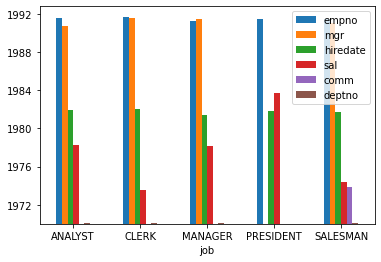

In [102]:
grouped = emp.groupby('job')
ax = grouped.max().plot.bar(rot=0)
fig = ax.get_figure()
fig.savefig('result.jpg')